# Assignment Part 1: Reinforcement Learning on a Grid World

# Problem Description

We are tasked with implementing two reinforcement learning algorithms, SARSA and Q-Learning, to navigate an agent through a 5x5 grid world. The goal is for the agent to start from a designated starting state and reach one of the terminal states while avoiding penalty states (red states). The environment is defined as follows:

- Grid Size: 5x5
-Start State: (4, 0)
-Terminal States: (0, 0) and (0, 4)
-Red States: (2, 0), (2, 1), (2, 3), and (2, 4)
-Actions: Right (0, 1), Down (1, 0), Left (0, -1), Up (-1, 0)

* Rewards:

  - 20 for entering a red state (resets to start state)
  -1 for all other transitions
  -0 for reaching a terminal state

# Environment Setup

First, we define the environment and helper functions for the grid world.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment parameters
grid_size = (5, 5)
start_state = (4, 0)
terminal_states = [(0, 0), (0, 4)]
red_states = [(2, 0), (2, 1), (2, 3), (2, 4)]
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up

# Hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000

# Helper functions
def is_terminal(state):
    return state in terminal_states

def get_reward(state):
    if state in red_states:
        return -20
    return -1

def step(state, action):
    next_state = (state[0] + action[0], state[1] + action[1])
    if next_state[0] < 0 or next_state[0] >= grid_size[0] or next_state[1] < 0 or next_state[1] >= grid_size[1]:
        return state, -1  # Stay in bounds
    if next_state in red_states:
        return start_state, -20  # Reset to start
    return next_state, -1

def choose_action(state, Q):
    if np.random.rand() < epsilon:
        return np.random.choice(len(actions))
    return np.argmax(Q[state[0], state[1]])


# SARSA Algorithm

Next, we implement the SARSA algorithm to estimate the Q-values and plot the resulting trajectory.

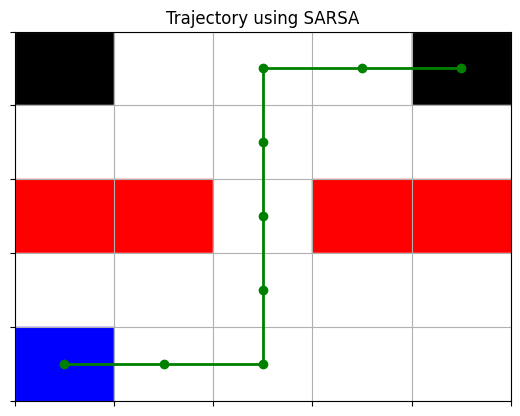

In [54]:
# Initialize Q-table
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))

# SARSA Algorithm
for _ in range(episodes):
    state = start_state
    action = choose_action(state, Q) # Pass the entire Q array
    while not is_terminal(state):
        next_state, reward = step(state, actions[action])
        next_action = choose_action(next_state, Q) # Pass the entire Q array
        Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])
        state, action = next_state, next_action

# Plot the trajectory
def plot_trajectory(Q):
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, grid_size[1]-0.5)
    ax.set_ylim(-0.5, grid_size[0]-0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.invert_yaxis()

    # Color the states
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='white')  # Default color
            if (x, y) in red_states:
                rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='red')
            if (x, y) in terminal_states:
                rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='black')
            if (x, y) == start_state:
                rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='blue')
            ax.add_patch(rect)

    # Plot the trajectory
    state = start_state
    trajectory = [state]
    while not is_terminal(state):
        action = np.argmax(Q[state[0], state[1]])
        state, _ = step(state, actions[action])
        trajectory.append(state)
        if state in terminal_states:
            break
    xs, ys = zip(*[(s[1], s[0]) for s in trajectory])
    ax.plot(xs, ys, marker='o', color='green', linewidth=2)

    plt.title('Trajectory using SARSA')
    plt.show()

plot_trajectory(Q)

# Q-Learning Algorithm

Next, we implement the Q-Learning algorithm and plot the resulting trajectory.

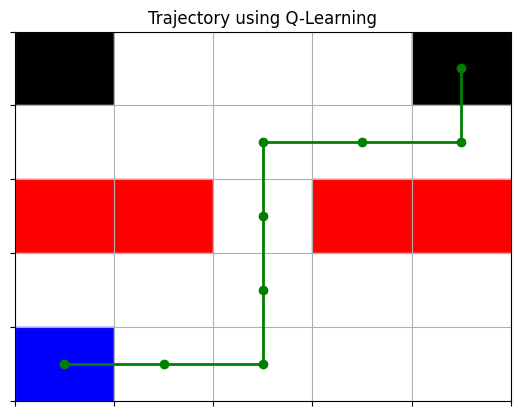

In [55]:
# Initialize Q-table
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))

# Q-Learning Algorithm
for _ in range(episodes):
    state = start_state
    while not is_terminal(state):
        action = choose_action(state, Q) # Pass the entire Q-table to choose_action
        next_state, reward = step(state, actions[action])
        best_next_action = np.argmax(Q[next_state[0], next_state[1]])
        Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])
        state = next_state

# Plot the trajectory
def plot_trajectory(Q):
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, grid_size[1]-0.5)
    ax.set_ylim(-0.5, grid_size[0]-0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.invert_yaxis()

    # Color the states
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='White')  # Default color
            if (x, y) in red_states:
                rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='red')
            if (x, y) in terminal_states:
                rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='black')
            if (x, y) == start_state:
                rect = plt.Rectangle((y-0.5, x-0.5), 1, 1, color='blue')
            ax.add_patch(rect)

    # Plot the trajectory
    state = start_state
    trajectory = [state]
    while not is_terminal(state):
        action = np.argmax(Q[state[0], state[1]])
        state, _ = step(state, actions[action])
        trajectory.append(state)
        if state in terminal_states:
            break
    xs, ys = zip(*[(s[1], s[0]) for s in trajectory])
    ax.plot(xs, ys, marker='o', color='green', linewidth=2)

    plt.title('Trajectory using Q-Learning')
    plt.show()

plot_trajectory(Q)


# Reward Tracking of SARSA Algorithm

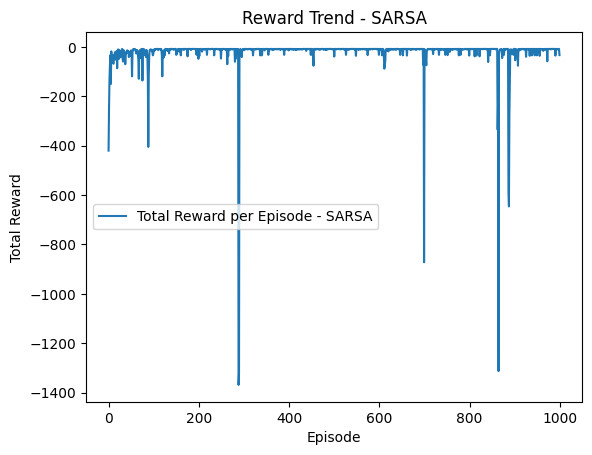

In [56]:
# Reward Tracking for SARSA
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))
rewards_sarsa = []  # List to store rewards for each episode

# SARSA Algorithm with reward tracking
for _ in range(episodes):
    total_reward = 0
    state = start_state
    action = choose_action(state, Q)  # Pass the entire Q array
    while not is_terminal(state):
        next_state, reward = step(state, actions[action])
        total_reward += reward
        next_action = choose_action(next_state, Q)  # Pass the entire Q array
        Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])
        state, action = next_state, next_action
    rewards_sarsa.append(total_reward)

# Plot the total reward trend over episodes
plt.plot(rewards_sarsa, label='Total Reward per Episode - SARSA')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Trend - SARSA')
plt.legend()
plt.show()

# Reward Tracking of Q-Learning Algorithm

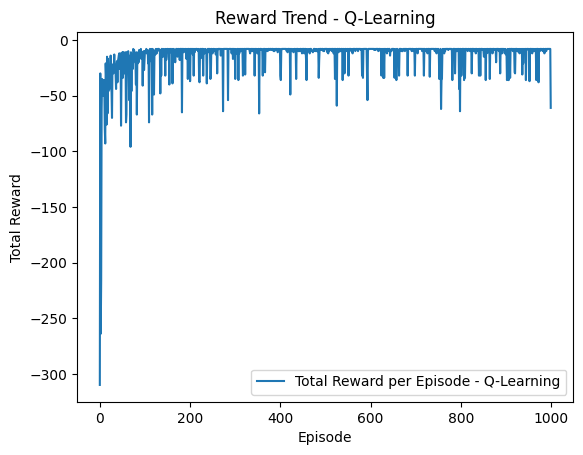

In [57]:
# Initialize Q-table
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))
rewards_q_learning = []  # List to store rewards for each episode

# Q-Learning Algorithm with reward tracking
for _ in range(episodes):
    total_reward = 0
    state = start_state
    while not is_terminal(state):
        # Pass the entire Q-table to choose_action
        action = choose_action(state, Q)
        next_state, reward = step(state, actions[action])
        total_reward += reward
        best_next_action = np.argmax(Q[next_state[0], next_state[1]])
        Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])
        state = next_state
    rewards_q_learning.append(total_reward)

# Plot the total reward trend over episodes
plt.plot(rewards_q_learning, label='Total Reward per Episode - Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Trend - Q-Learning')
plt.legend()
plt.show()


# Explanation and Analysis:
# SARSA Trajectory Analysis:
The SARSA trajectory plot demonstrates how the agent starts at the designated blue square and navigates through the grid while avoiding penalty states (red squares) and reaching terminal states (black squares). The agent learns through exploration, initially taking suboptimal paths but gradually improving as it gains experience. This cautious learning approach helps the agent avoid penalties, resulting in safer paths overall.

# Q-learning Trajectory Analysis:
The Q-learning trajectory plot shows the agent's path, starting at the blue square, avoiding red squares, and reaching terminal states. Q-learning, being an off-policy algorithm, allows the agent to learn more optimal paths faster compared to SARSA. This results in more direct paths to terminal states. The trajectory plot reflects this efficiency in finding the shortest path, balancing exploration and exploitation effectively.

# Reward Trends Analysis:
The reward trends for both SARSA and Q-learning show the total rewards accumulated over episodes:

# SARSA Reward Trend Analysis:
- Initial episodes exhibit high variability as the agent explores the grid.
- Over time, the rewards stabilize, indicating successful learning.
- Occasional drops in reward suggest exploration of suboptimal paths or penalty states.
# Q-learning Reward Trend Analysis:
- Faster convergence to higher rewards due to the off-policy nature of Q-learning.
- Steep learning curve in initial episodes, with occasional significant drops indicating exploration mistakes.
- Overall, a stable reward trend is achieved faster than SARSA.
# Comparative Insights:
- Efficiency of Learning:
 - Q-learning learns more efficiently, converging to optimal policies faster due to its off-policy nature.
 - SARSA takes longer but results in safer paths.
- Risk and Safety:
 - Q-learning occasionally makes significant exploration mistakes, indicated by deep drops in reward trends.
 - SARSA's on-policy approach results in safer, more conservative learning.
-Optimality of Policy:
 - Q-learning demonstrates faster convergence to optimal policies.
 - SARSA shows more cautious learning, resulting in potentially safer but suboptimal paths initially.

# Trajectory Evaluation:
Based on the trajectories provided from both the SARSA and Q-learning algorithms, it's clear that the paths taken by the agent under each algorithm are somewhat different, though both avoid the penalty states and reach a terminal state successfully.

- **Path Variation**: The trajectories indicate that while both paths are efficient, they take slightly different routes to the terminal states. This variation can be attributed to how each algorithm updates its Q-values and the exploration strategy.

# Exploration vs. Exploitation:

- **SARSA**: Being an on-policy algorithm, SARSA directly incorporates the current policy's exploration into its updates. This means it updates its Q-values using the action actually taken from the state, which can include exploratory moves due to ε-greedy policy. This can lead to more conservative paths when the exploration rate is significant.

- **Q-Learning**: As an off-policy method, Q-learning updates its Q-values using the maximum reward for the next state as if a greedy policy were followed, regardless of the action actually taken. This can result in a more optimal but risky path, as it assumes the best possible action will always be taken next.

# Why Differences Matter:

 - Learning Speed and Convergence: Q-learning might converge to an optimal policy faster because it always considers the best possible future reward. However, this can also lead to overestimations and potentially unstable learning if not managed with techniques like learning rate decay or more sophisticated exploration decay.

 - Risk of Exploration: In environments with potentially dangerous states like the red states in the grid, SARSA might be preferred as it typically learns safer policies due to its on-policy nature.

# Conclusion:
Both SARSA and Q-learning effectively navigate the grid, avoiding penalties and reaching terminal states. Q-learning converges faster to an optimal policy, while SARSA exhibits safer, more conservative learning. The reward tracking plots provide valuable insights into the learning behavior and efficiency of each algorithm.

# Part 2: Random Walk on a 7x7 Grid

# Problem Description

In this part, we consider a random walk on a 7x7 grid. The agent starts at the center of the grid and is equally likely to move up, down, left, or right. The lower left and upper right corners are terminal states with rewards -1 and 1, respectively. All other transitions receive a reward of 0, and attempts to move outside the grid result in the agent staying in place with a reward of 0.

We will compute the value function for this random walk policy using the following methods:

1. Gradient Monte Carlo Method
2. Semi-Gradient TD(0) Method with an affine function approximation
3. Compare the estimated value functions to the exact value function.

# Environment Setup

In [58]:
import numpy as np

# Define grid and parameters
grid_size = 7
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
terminal_states = {(0, 0): -1, (6, 6): 1}
alpha = 0.01  # Learning rate
episodes = 10000

# Feature vector for states
def feature_vector(state):
    feature = np.zeros(grid_size * grid_size)
    index = state[0] * grid_size + state[1]
    feature[index] = 1
    return feature

# Policy function: random walk
def policy(state):
    return actions[np.random.choice(len(actions))]

# Random walk generator
def generate_episode():
    state = (3, 3)
    episode = []
    while state not in terminal_states:
        action = policy(state)
        next_state = (state[0] + action[0], state[1] + action[1])
        if 0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size:
            episode.append((state, action, next_state))
            state = next_state
        if state in terminal_states:
            episode.append((state, None, None))
            break
    return episode, terminal_states[state]


# Gradient Monte Carlo Method

In [59]:
# Parameters for value function
theta_mc = np.random.randn(grid_size * grid_size)

# Gradient Monte Carlo algorithm
for _ in range(episodes):
    episode, G = generate_episode()
    for state, _, _ in episode:
        fv = feature_vector(state)
        current_value = np.dot(theta_mc, fv)
        theta_mc += alpha * (G - current_value) * fv

# Display the estimated values
estimated_values = np.reshape(np.dot(theta_mc, np.eye(grid_size * grid_size)), (grid_size, grid_size))
print("Estimated Values:\n", estimated_values)


Estimated Values:
 [[-1.         -0.64326254 -0.42948598 -0.20314084  0.03712764  0.15476103
   0.12169505]
 [-0.60155626 -0.50645982 -0.23224687  0.07176044  0.12822491  0.1525259
   0.1125103 ]
 [-0.28792395 -0.2429836  -0.08889788  0.03099665 -0.01543179  0.14155648
   0.14959643]
 [ 0.15335769  0.0997855   0.03187148  0.07670502  0.12256677  0.21599423
   0.3481393 ]
 [ 0.36957529  0.30699495  0.33098118  0.26441831  0.26064038  0.27577416
   0.47476148]
 [ 0.39846369  0.41892726  0.4738818   0.32840353  0.34562192  0.39853913
   0.54469447]
 [ 0.32567701  0.28201717  0.41115219  0.48033371  0.41930198  0.53780676
   1.        ]]


# Semi-Gradient TD(0) Method with Affine Function Approximation

In [60]:
theta_td = np.random.randn(grid_size * grid_size)  # Reset parameters

# TD(0) Learning
for _ in range(episodes):
    state = (3, 3)
    while state not in terminal_states:
        action = policy(state)
        next_state = (state[0] + action[0], state[1] + action[1])
        if not (0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size):
            next_state = state
        fv = feature_vector(state)
        next_fv = feature_vector(next_state)
        reward = 0 if next_state not in terminal_states else terminal_states[next_state]
        td_target = reward + np.dot(theta_td, next_fv)
        td_error = td_target - np.dot(theta_td, fv)
        theta_td += alpha * td_error * fv
        state = next_state

# Display the estimated values
estimated_values = np.reshape(np.dot(theta_td, np.eye(grid_size * grid_size)), (grid_size, grid_size))
print("Estimated Values:\n", estimated_values)

Estimated Values:
 [[-1.23383352 -1.46784899 -1.03781748 -0.75923313 -0.50352587 -0.37332312
  -0.29446361]
 [-1.49619794 -1.19768423 -0.92152877 -0.65445174 -0.4350089  -0.29136446
  -0.22881546]
 [-1.09055509 -0.88774891 -0.69342248 -0.4713717  -0.29252183 -0.16274539
  -0.06848872]
 [-0.76315535 -0.6527193  -0.47660221 -0.30639697 -0.11838209  0.02078251
   0.12365991]
 [-0.51773536 -0.44321661 -0.30226892 -0.12597536  0.07978427  0.28949886
   0.44173508]
 [-0.38594741 -0.30278823 -0.17579335  0.02845673  0.25765008  0.62506425
   0.90872063]
 [-0.31088959 -0.224812   -0.10501475  0.12069996  0.42139105  0.9142255
   0.63414383]]


# Exact Value Function

In [61]:
# Exact Value Function
def is_terminal(state):
    return state in terminal_states

def get_neighbors(state):
    neighbors = []
    for action in actions:
        next_state = (state[0] + action[0], state[1] + action[1])
        if 0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size:
            neighbors.append(next_state)
    return neighbors

# Initialize value function
V = np.zeros((grid_size, grid_size))

# Set terminal states
V[0, 0] = -1
V[6, 6] = 1

# Policy evaluation for equiprobable actions
theta = 0.0001  # Small threshold for convergence

while True:
    delta = 0
    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) in terminal_states:
                continue
            v = V[x, y]
            neighbors = get_neighbors((x, y))
            # Calculate the average of the neighbors
            V[x, y] = sum(V[ns[0], ns[1]] for ns in neighbors) / len(neighbors)
            delta = max(delta, abs(v - V[x, y]))
    if delta < theta:
        break

# Print the computed exact value function
print("Exact Value Function:")
print(V)


Exact Value Function:
[[-1.         -0.61116284 -0.3773704  -0.22005909 -0.11072602 -0.03943215
  -0.00372346]
 [-0.61116284 -0.4559828  -0.30072427 -0.17189795 -0.0724953  -0.00365362
   0.03208033]
 [-0.3773704  -0.30072427 -0.19747175 -0.09412887 -0.00351568  0.06541926
   0.10370767]
 [-0.22005909 -0.17189795 -0.09412887 -0.00344758  0.08732175  0.16531233
   0.21370349]
 [-0.11072602 -0.0724953  -0.00351568  0.08732175  0.19110332  0.29495753
   0.37215528]
 [-0.03943215 -0.00365362  0.06541926  0.16531233  0.29495753  0.45138117
   0.60784548]
 [-0.00372346  0.03208033  0.10370767  0.21370349  0.37215528  0.60784548
   1.        ]]


# Visualization and Comparison

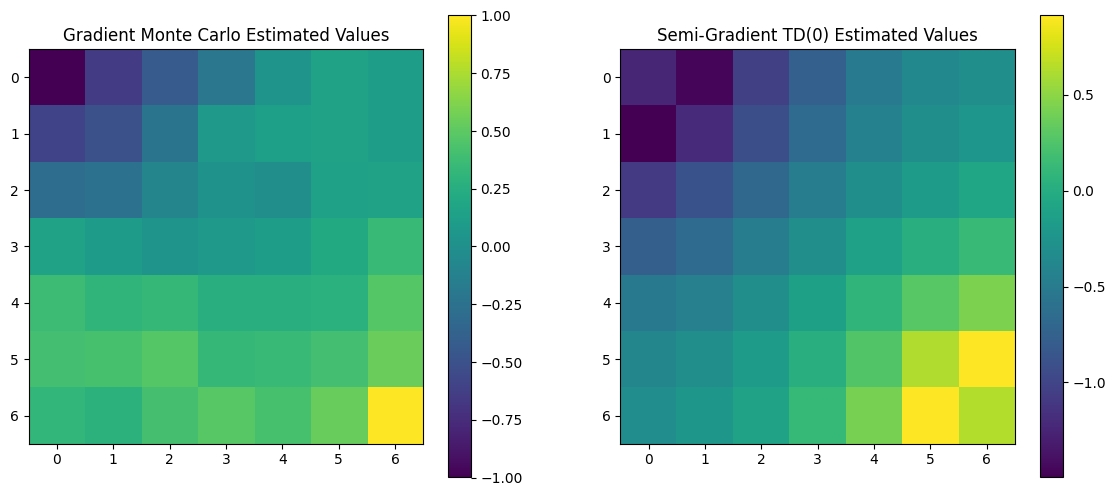

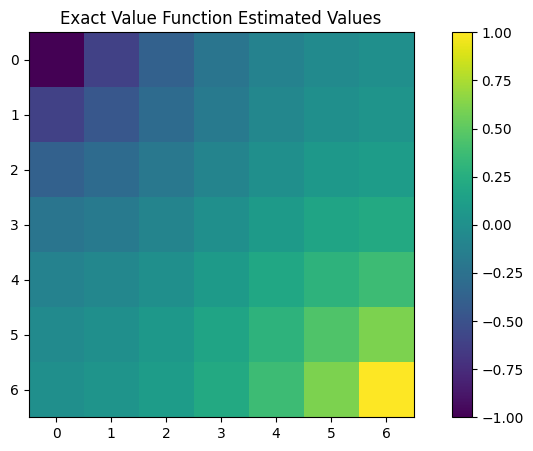

In [62]:
# Visualization
plt.figure(figsize=(14, 6))

# Plot for Gradient Monte Carlo
plt.subplot(1, 2, 1)
values_mc = np.reshape(np.dot(theta_mc, np.eye(grid_size * grid_size)), (grid_size, grid_size))
plt.imshow(values_mc, cmap='viridis', interpolation='nearest')
plt.title('Gradient Monte Carlo Estimated Values')
plt.colorbar()

# Plot for Semi-Gradient TD(0)
plt.subplot(1, 2, 2)
values_td = np.reshape(np.dot(theta_td, np.eye(grid_size * grid_size)), (grid_size, grid_size))
plt.imshow(values_td, cmap='viridis', interpolation='nearest')
plt.title('Semi-Gradient TD(0) Estimated Values')
plt.colorbar()

# Visualization of Exact Value Function
plt.figure(figsize=(10, 5))
plt.imshow(V, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Exact Value Function Estimated Values')
plt.show()

#Evaluation

The comparison between the Gradient Monte Carlo, Semi-Gradient TD(0), and the Exact Value Function heatmaps reveals several interesting points about the efficiency and accuracy of the approximation methods relative to the exact calculation:

#Gradient Monte Carlo Estimated Values

**General Trend:** The values from Gradient Monte Carlo show a clear gradient from the negative terminal state to the positive terminal state, suggesting that it reasonably captures the expected value of being in each state.

**Smooth Transition:** The gradient is relatively smooth, indicating that the method does a good job averaging out the stochastic effects of the random walk across many simulations.

**Alignment with Exact Values:** While it aligns well in direction, there are noticeable discrepancies in the smoothness and the exact values at certain states, especially further from the terminals.

#Semi-Gradient TD(0) Estimated Values

**Sharper Transitions:** The TD(0) results show more variability and less smooth transitions between values compared to the Monte Carlo results. This suggests more localized learning updates, which might not have fully converged or might be sensitive to initial conditions and learning parameters.

**Accuracy and Bias:** TD(0) appears to have some bias, especially near the negative terminal state where it doesn't appropriately estimate the high negative impact as effectively as Monte Carlo or the exact method.

#Exact Value Function Estimated Values

**Consistent Gradient:** The exact values display a consistent and smooth gradient of values from the negative terminal to the positive terminal. This method, theoretically perfect, serves as a benchmark to evaluate the accuracy of the other methods.

**Uniformity and Symmetry:** The exact method shows a uniform progression of values which is symmetrically aligned with the geometry of the problem—center values are equidistant from both terminals and show an intermediate value.

#Analysis of Differences

#Methodological Influence:

**Gradient Monte Carlo:** This method estimates values by averaging returns over many episodes, which can smooth out the randomness inherent in the random walk. Its estimates tend to be smoother but may suffer from high variance if not enough episodes are used.

**Semi-Gradient TD(0):** Being a bootstrapping method, it updates estimates based on other estimates rather than waiting for final outcomes. This can lead to faster learning but can introduce bias if the estimates are not accurate or the learning parameters are not well-tuned.

#Performance Evaluation:

**Smoothness and Stability:** Monte Carlo tends to be more stable and smoother due to averaging over complete returns, whereas TD(0) can react faster to changes but might be less stable and more dependent on the quality of the function approximation.

**Convergence and Learning Rate:** Both methods' performance highly depends on the learning rate and the number of episodes. Monte Carlo generally requires more episodes to converge due to its reliance on complete returns, whereas TD(0) might converge faster but to a biased solution.

#Conclusion:
The comparison reveals the efficiency and accuracy of the approximation methods relative to the exact calculation. Gradient Monte Carlo shows smoother value estimations, while Semi-Gradient TD(0) provides faster but potentially biased learning. The exact value function serves as a benchmark for evaluating the other methods.